# Loading Packages

In [56]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt  

import warnings   
warnings.filterwarnings("ignore")

# Reading data

In [57]:
train=pd.read_csv("train_s3TEQDk.csv") 
test=pd.read_csv("test_mSzZ8RL.csv")
TEST=pd.read_csv("test_mSzZ8RL.csv")

# MISSING VALUE TREATMENT

## Train

In [58]:
(train.isnull().sum()/train.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [59]:
train['Credit_Product'].fillna(train['Credit_Product'].mode()[0], inplace = True)

In [60]:
(train.isnull().sum()/train.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

## Test

In [61]:
(test.isnull().sum()/test.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [62]:
test['Credit_Product'].fillna(train['Credit_Product'].mode()[0], inplace = True)

In [63]:
(test.isnull().sum()/test.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
dtype: float64

# TYPECASTING

## Train

In [64]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [65]:
train['Gender'] = train['Gender'].astype('category')
train['Region_Code'] = train['Region_Code'].astype('category')
train['Occupation'] = train['Occupation'].astype('category')
train['Channel_Code'] = train['Channel_Code'].astype('category')
train['Credit_Product'] = train['Credit_Product'].astype('category')
train['Is_Active'] = train['Is_Active'].astype('category')

In [66]:
train.dtypes

ID                       object
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

## Test

In [67]:
test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [68]:
test['Gender'] = test['Gender'].astype('category')
test['Region_Code'] = test['Region_Code'].astype('category')
test['Occupation'] = test['Occupation'].astype('category')
test['Channel_Code'] = test['Channel_Code'].astype('category')
test['Credit_Product'] = test['Credit_Product'].astype('category')
test['Is_Active'] = test['Is_Active'].astype('category')

In [69]:
test.dtypes

ID                       object
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
dtype: object

# Feature Engineering

## Train

In [70]:
train['Region_Code'].value_counts().median()

3976.0

In [71]:
# getting region codes which have less accounts
tmp = train['Region_Code'].value_counts()[:]
regions = tmp[tmp<train['Region_Code'].value_counts().median()].index

In [72]:
train['Region_range'] = 'str'
train['Region_range'][train['Region_Code'].isin(regions[:])] = 'Low Accounts'
train['Region_range'][~train['Region_Code'].isin(regions[:])] = 'High Accounts'
train['Region_range'] = train['Region_range'].astype('category')

In [73]:
train['Region_Code'].value_counts()[:]

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [74]:
train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_range
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,High Accounts
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,High Accounts
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,High Accounts
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,High Accounts
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,High Accounts
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0,High Accounts
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750,Yes,1,High Accounts
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0,Low Accounts
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0,High Accounts
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0,High Accounts


## Test

In [75]:
test['Region_Code'].value_counts().median()

1615.0

In [76]:
# getting region codes which have less accounts
tmp = test['Region_Code'].value_counts()[:]
regions = tmp[tmp<test['Region_Code'].value_counts().median()].index

In [77]:
test['Region_range'] = 'str'
test['Region_range'][test['Region_Code'].isin(regions[:])] = 'Low Accounts'
test['Region_range'][~test['Region_Code'].isin(regions[:])] = 'High Accounts'
test['Region_range'] = test['Region_range'].astype('category')

In [78]:
test['Region_Code'].value_counts()[:]

RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

In [79]:
test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_range
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,High Accounts
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,High Accounts
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,High Accounts
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,High Accounts
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,High Accounts
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No,High Accounts
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No,Low Accounts
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No,High Accounts
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,No,1001232,Yes,High Accounts
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No,High Accounts


In [80]:
# Drop the variables which we used to create these new features 
train=train.drop(['Region_Code'], axis=1) 
test=test.drop(['Region_Code'], axis=1)

In [81]:
train.head(10)

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_range
0,NNVBBKZB,Female,73,Other,X3,43,No,1045696,No,0,High Accounts
1,IDD62UNG,Female,30,Salaried,X1,32,No,581988,No,0,High Accounts
2,HD3DSEMC,Female,56,Self_Employed,X3,26,No,1484315,Yes,0,High Accounts
3,BF3NC7KV,Male,34,Salaried,X1,19,No,470454,No,0,High Accounts
4,TEASRWXV,Female,30,Salaried,X1,33,No,886787,No,0,High Accounts
5,ACUTYTWS,Male,56,Self_Employed,X1,32,No,544163,Yes,0,High Accounts
6,ETQCZFEJ,Male,62,Other,X3,20,No,1056750,Yes,1,High Accounts
7,JJNJUQMQ,Female,48,Self_Employed,X3,13,No,444724,Yes,0,Low Accounts
8,ZMQFYKCB,Female,40,Self_Employed,X2,38,No,1274284,No,0,High Accounts
9,NVKTFBA2,Female,55,Self_Employed,X2,49,Yes,2014239,No,0,High Accounts


In [82]:
test.head(10)

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_range
0,VBENBARO,Male,29,Other,X1,25,Yes,742366,No,High Accounts
1,CCMEWNKY,Male,43,Other,X2,49,No,925537,No,High Accounts
2,VK3KGA9M,Male,31,Salaried,X1,14,No,215949,No,High Accounts
3,TT8RPZVC,Male,29,Other,X1,33,No,868070,No,High Accounts
4,SHQZEYTZ,Female,29,Other,X1,19,No,657087,No,High Accounts
5,MZZAQMPT,Male,60,Self_Employed,X3,110,No,4624262,No,High Accounts
6,Y88TW36I,Female,69,Other,X2,67,No,1032764,No,Low Accounts
7,3UGOAQNU,Female,30,Salaried,X1,33,No,837009,No,High Accounts
8,VVUKMUJT,Male,43,Salaried,X3,81,No,1001232,Yes,High Accounts
9,9R363ZXS,Female,54,Self_Employed,X2,37,Yes,1667851,No,High Accounts


# Handling Categorical variables

In [83]:
train_cleaned=train.drop('ID',axis=1) 
test_cleaned=test.drop('ID',axis=1)

In [84]:
train_cleaned=pd.get_dummies(train_cleaned) 
test_cleaned=pd.get_dummies(test_cleaned)

In [85]:
train_cleaned.shape

(245725, 20)

In [86]:
test_cleaned.shape

(105312, 19)

In [87]:
train.head()

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_range
0,NNVBBKZB,Female,73,Other,X3,43,No,1045696,No,0,High Accounts
1,IDD62UNG,Female,30,Salaried,X1,32,No,581988,No,0,High Accounts
2,HD3DSEMC,Female,56,Self_Employed,X3,26,No,1484315,Yes,0,High Accounts
3,BF3NC7KV,Male,34,Salaried,X1,19,No,470454,No,0,High Accounts
4,TEASRWXV,Female,30,Salaried,X1,33,No,886787,No,0,High Accounts


In [88]:
train_cleaned.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Region_range_High Accounts,Region_range_Low Accounts
0,73,43,1045696,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,30,32,581988,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,56,26,1484315,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
3,34,19,470454,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,30,33,886787,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [89]:
test.head()

,ID,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_range
0,VBENBARO,Male,29,Other,X1,25,Yes,742366,No,High Accounts
1,CCMEWNKY,Male,43,Other,X2,49,No,925537,No,High Accounts
2,VK3KGA9M,Male,31,Salaried,X1,14,No,215949,No,High Accounts
3,TT8RPZVC,Male,29,Other,X1,33,No,868070,No,High Accounts
4,SHQZEYTZ,Female,29,Other,X1,19,No,657087,No,High Accounts


In [90]:
test_cleaned.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Region_range_High Accounts,Region_range_Low Accounts
0,29,25,742366,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0
1,43,49,925537,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0
2,31,14,215949,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0
3,29,33,868070,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0
4,29,19,657087,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0


# Model Building

In [108]:
train_cleaned.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Region_range_High Accounts,Region_range_Low Accounts
0,73,43,1045696,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
1,30,32,581988,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,56,26,1484315,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
3,34,19,470454,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0
4,30,33,886787,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0


In [109]:
#seperating independent and dependent variables
y = train_cleaned['Is_Lead']
X = train_cleaned.drop(['Is_Lead'], axis=1)

In [110]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [111]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [112]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.762791
1    0.237209
Name: Is_Lead, dtype: float64

In [113]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.762795
1    0.237205
Name: Is_Lead, dtype: float64

In [114]:
#shape of training set
X_train.shape, y_train.shape

((184293, 19), (184293,))

In [115]:
#shape of validation set
X_valid.shape, y_valid.shape

((61432, 19), (61432,))

In [196]:
#import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

## KNN

In [189]:
#creating the knn function
knn = KNeighborsClassifier()

In [190]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [191]:
#predictions 
train_predict = knn.predict(X_train)
val_predict = knn.predict(X_valid)
test_predict = knn.predict(test_cleaned)

In [192]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.8018155871357023
Validation Accuracy:  0.7308894387290011


In [193]:
val_predict_prob_1=knn.predict_proba(X_valid)[:,1]

In [194]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.5738291980398683


## Tuning KNN

In [203]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn_params = {'leaf_size' : range(25, 50),
              'n_neighbors' : range(5, 20, 2), 
              'p': [1,2],
              'weights': ['uniform', 'distance'] 
              }

In [204]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), 
                                   param_distributions = knn_params, 
                                   scoring=metrics.roc_auc_score, 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose = 1,
                                   n_iter = 10)

In [205]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': range(25, 50),
                                        'n_neighbors': range(5, 20, 2),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring=<function roc_auc_score at 0x7f9f1d3d60e0>,
                   verbose=1)

In [206]:
random_search.best_params_

{'leaf_size': 32, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [207]:
random_search.best_estimator_

KNeighborsClassifier(leaf_size=32, n_neighbors=9)

## Creating a knn instance with new hyperparameter values

In [208]:
#creating the knn function
knn = random_search.best_estimator_

In [209]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=32, n_neighbors=9)

In [210]:
#predictions 
train_predict = knn.predict(X_train)
val_predict = knn.predict(X_valid)
test_predict = knn.predict(test_cleaned)

In [211]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.7781901645748889
Validation Accuracy:  0.7466629769501237


In [212]:
val_predict_prob_1=knn.predict_proba(X_valid)[:,1]

In [213]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.5701991129978868


## Logistic Regression

In [197]:
#creating the logistic regression function
lr = LogisticRegression()

In [198]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [199]:
#predictions 
train_predict = lr.predict(X_train)
val_predict = lr.predict(X_valid)
test_predict = lr.predict(test_cleaned)

In [200]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.7627907733880288
Validation Accuracy:  0.7627946347180622


In [201]:
val_predict_prob_1=lr.predict_proba(X_valid)[:,1]

In [202]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.44575219473287536


## DT

In [117]:
#creating the decision tree function
dt = DecisionTreeClassifier(random_state=10)

In [118]:
#fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [119]:
#predictions 
train_predict = dt.predict(X_train)
val_predict = dt.predict(X_valid)
test_predict = dt.predict(test_cleaned)

In [120]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.9999511647213948
Validation Accuracy:  0.7100859486912359


In [121]:
val_predict_prob_1=dt.predict_proba(X_valid)[:,1]

In [122]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.6072071301447629


## Tuning DT

In [104]:
train_score = []
validation_score = []
for depth in range(1,30):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt.fit(X_train, y_train)

    train_predict = dt.predict(X_train)
    train_predict_prob_1=dt.predict_proba(X_train)[:,1]
    train_rocauc=metrics.roc_auc_score(y_train, train_predict_prob_1)
    train_score.append(train_rocauc)

    val_predict = dt.predict(X_valid)
    val_predict_prob_1=dt.predict_proba(X_valid)[:,1]
    val_rocauc=metrics.roc_auc_score(y_valid, val_predict_prob_1)
    validation_score.append(val_rocauc)


In [105]:
df = pd.DataFrame({'max_depth': range(1, 30), 'train_score': train_score, 'validation_score': validation_score})
df

,max_depth,train_score,validation_score
0,1,0.658479,0.661857
1,2,0.725174,0.725773
2,3,0.739486,0.739568
3,4,0.753028,0.752796
4,5,0.763977,0.762944
5,6,0.775045,0.773116
6,7,0.782531,0.779057
7,8,0.786408,0.780045
8,9,0.790375,0.779367
9,10,0.794652,0.776234


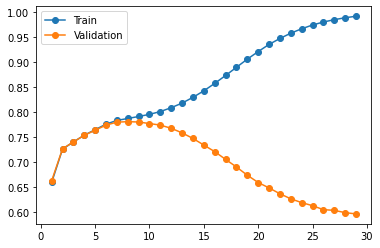

In [107]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['max_depth'], df['train_score'], marker = 'o', label = 'Train')
plt.plot(df['max_depth'], df['validation_score'], marker = 'o', label = 'Validation')
plt.legend()

## Creating a decision tree instance with new hyperparameter values

In [123]:
# Creating the decision tree function
dt = DecisionTreeClassifier(random_state=10,max_depth=14)

In [124]:
# Fitting the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=10)

In [125]:
#predictions 
train_predict = dt.predict(X_train)
val_predict = dt.predict(X_valid)
test_predict = dt.predict(test_cleaned)

In [126]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.8153266808831588
Validation Accuracy:  0.7803262143508269


In [127]:
val_predict_prob_1=dt.predict_proba(X_valid)[:,1]

In [128]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.7464299967699793


## RF

In [130]:
# Creating the random forest function
rf = RandomForestClassifier(random_state=10)

In [131]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [132]:
#predictions 
train_predict = rf.predict(X_train)
val_predict = rf.predict(X_valid)
test_predict = rf.predict(test_cleaned)

In [133]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.9998317895959152
Validation Accuracy:  0.7619318921734601


In [134]:
val_predict_prob_1=rf.predict_proba(X_valid)[:,1]

In [135]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.737336919540852


## Tuning RF

In [138]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_params = {
    'max_depth': [20, 25, 30, 45, 60], 
    'min_samples_split': range(2, 30, 5), 
    'max_leaf_nodes': range(2, 10, 2),
    'n_estimators': [100, 300, 400, 500, 700]
    }

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=10), 
                                 param_distributions = rf_params, 
                                 scoring = metrics.roc_auc_score, cv = 3, 
                                 verbose = 1, n_iter = 10,
                                 n_jobs = -1)

In [139]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 25, 30, 45, 60],
                                        'max_leaf_nodes': range(2, 10, 2),
                                        'min_samples_split': range(2, 30, 5),
                                        'n_estimators': [100, 300, 400, 500,
                                                         700]},
                   scoring=<function roc_auc_score at 0x7f9f1d3d60e0>,
                   verbose=1)

In [140]:
random_search.best_params_

{'max_depth': 20,
 'max_leaf_nodes': 2,
 'min_samples_split': 22,
 'n_estimators': 700}

In [141]:
random_search.best_estimator_

RandomForestClassifier(max_depth=20, max_leaf_nodes=2, min_samples_split=22,
                       n_estimators=700, random_state=10)

## Creating a random forest instance with new hyperparameter values

In [179]:
# Creating the random forest function
rf=RandomForestClassifier(max_depth=10,
                       n_estimators=1000, random_state=10)

In [180]:
# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=10)

In [181]:
#predictions 
train_predict = rf.predict(X_train)
val_predict = rf.predict(X_valid)
test_predict = rf.predict(test_cleaned)

In [182]:
#accuracy
acc_train=accuracy_score( y_train,train_predict)
acc_val=accuracy_score(y_valid,val_predict)
print('Training Accuracy: ', acc_train)
print('Validation Accuracy: ', acc_val)

Training Accuracy:  0.7952011199557227
Validation Accuracy:  0.7906302904023962


In [183]:
val_predict_prob_1=rf.predict_proba(X_valid)[:,1]

In [184]:
# ROC_AUC score
from sklearn import metrics
roc_auc = metrics.roc_auc_score(y_valid, val_predict_prob_1)
print(roc_auc)

0.784753302775252


# Submission

In [185]:
TEST['predicted Is_Lead'] = test_predict
TEST.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,predicted Is_Lead
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,0
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,0
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No,0
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No,0
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No,0
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes,1
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No,0
